# Chapter 6: k Nearest Neighbours

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

## 6.1 Introduction & Motivation

As last classical classifier, we'll check ot the k-NN (Nearest Neighbors) algorithm. This is based on the very simple and logical idea that observations of the same class must resemble each other. In our digit examples this definitely makes sense, but what does this concetely mean and how can we tell a computer when things resemble each other?

This and much more is what we'll learn in this chapter! Excited yet?

## 6.2 Problem Setting

Once again, no surprises should be found in the following setup:

Image Data Shape (1797, 64)
Label Data Shape (1797,)


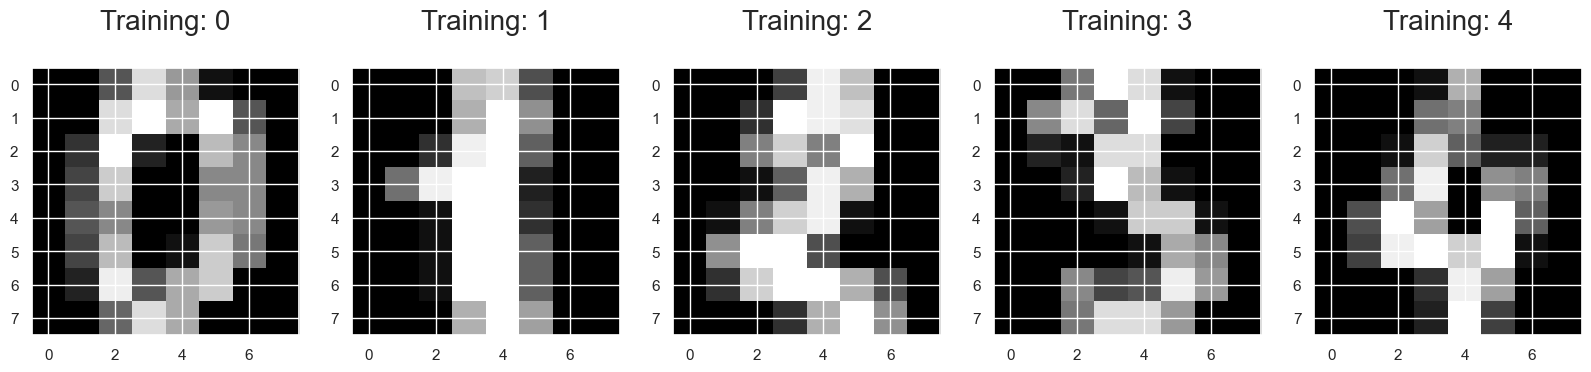

In [6]:
digits = datasets.load_digits()
dir(digits)
# data
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
x_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

## 6.3 Model

### 6.3.1 Model

In our digit database the indepent variables are difficult to illustrate, so let's look at a dataset like we did in the previous chapter:

![alt text](https://depiesml.files.wordpress.com/2015/08/knn_plot.png?w=600&h=586)

If we want a model to classify this type of data, we'll make use of one very important property of classes of data: they flock together in the right dimensions. That is, in these two variables (F1 and F2), we can clearly see that all the points of the same class are bunled together. In average, we can say that if we take a random blue point, we'll easier find another blue point nearby rather than say a green or red one.

It is exactly this what kNN does: it takes a point which we want to predict. For example, the grey point:

![alt text](https://depiesml.files.wordpress.com/2015/08/knn-k5-initial1.png?w=600&h=586)

The kNN algorithm then calculates the distance of all points starting from that point, and selects the $k$ nearest datapoints. 

![](https://depiesml.files.wordpress.com/2015/08/knn-k5-neighbor.png)

These points then "vote" on which class we would like to predict. Different voting schemes are possible; but most straightforward will be that: the class which is represented the most will be the prediction.

### 6.3.2 Model Estimation

That all sounds easy enough, but let's put that into practice.
We'll make a 9-Nearest-Neighbours classifier and fit it onto our data:

In [7]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

Next we can either make a prediction for a certain observation, multiple observations, or all observations of our test set:

In [8]:
# Returns a NumPy Array
# Predict for One Observation (image)
neigh.predict(X_test[0].reshape(1,-1))
neigh.predict(X_test[0:10])
predictions = neigh.predict(X_test)

In [9]:
print(predictions)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 7 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 1 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 1 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


## 6.4 Model Evaluation

### Accuracy

In [10]:
# accuracy
# Use score method to get accuracy of model
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9777777777777777


##### Question 1: Tweak the n_neighbors parameter to check which model gives the highest accuracy. Interpret! Explain what is happening in the model, and what the influence is on the accuracy. Is this logical? Are there any restraints on this parameter?


In [13]:
for n in range(1,110):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(x_train, y_train)
    predictions =neigh.predict(X_test)
    accuracy =accuracy_score(y_test,predictions)
    print(n,'-',accuracy)

1 - 0.9911111111111112
2 - 0.9844444444444445
3 - 0.9866666666666667
4 - 0.98
5 - 0.98
6 - 0.9755555555555555
7 - 0.9777777777777777
8 - 0.9777777777777777
9 - 0.9777777777777777
10 - 0.9755555555555555
11 - 0.9733333333333334
12 - 0.9733333333333334
13 - 0.9711111111111111
14 - 0.9711111111111111
15 - 0.9711111111111111
16 - 0.9688888888888889
17 - 0.9622222222222222
18 - 0.9622222222222222
19 - 0.9622222222222222
20 - 0.9644444444444444
21 - 0.9644444444444444
22 - 0.9644444444444444
23 - 0.96
24 - 0.9577777777777777
25 - 0.96
26 - 0.9577777777777777
27 - 0.9577777777777777
28 - 0.9577777777777777
29 - 0.9577777777777777
30 - 0.9555555555555556
31 - 0.9555555555555556
32 - 0.9555555555555556
33 - 0.9555555555555556
34 - 0.9577777777777777
35 - 0.9555555555555556
36 - 0.9555555555555556
37 - 0.9511111111111111
38 - 0.9488888888888889
39 - 0.9511111111111111
40 - 0.9488888888888889
41 - 0.9466666666666667
42 - 0.9488888888888889
43 - 0.9422222222222222
44 - 0.9422222222222222
45 - 0.94

### Precision

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.78      0.84      0.81        43
           2       0.90      0.84      0.87        44
           3       0.89      0.93      0.91        45
           4       0.97      0.87      0.92        38
           5       0.93      0.90      0.91        48
           6       0.95      1.00      0.97        52
           7       0.86      1.00      0.92        48
           8       0.97      0.73      0.83        48
           9       0.84      0.89      0.87        47

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



##### Question 2: Question 1: Tweak the n_neighbors parameter to check which model gives the highest accuracy. Interpret! Explain what is happening in the model, and what the influence is on precision. Is this logical? 

In [15]:
for n in range(1,110):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(x_train, y_train)
    predictions =neigh.predict(X_test)
    precision =precision_score(y_test,predictions,average='weighted')
    print(n,'-',precision)

1 - 0.9912519272278754
2 - 0.9847797109755174
3 - 0.9869043155104231
4 - 0.9806063626586576
5 - 0.9804995347423058
6 - 0.9768933388958421
7 - 0.9787938425447269
8 - 0.9787938425447269
9 - 0.9787938425447269
10 - 0.9766300998546684
11 - 0.9740569727616094
12 - 0.9740569727616094
13 - 0.9717642549229977
14 - 0.9719490700331057
15 - 0.9717642549229977
16 - 0.9697592653682111
17 - 0.9630693054386151
18 - 0.96315786131185
19 - 0.9629151761540511
20 - 0.9653658988144171
21 - 0.9653398368395811
22 - 0.9653398368395811
23 - 0.9606402530095626
24 - 0.9584839295994682
25 - 0.9607605842697701
26 - 0.9583923157869242
27 - 0.9583923157869242
28 - 0.9583923157869242
29 - 0.9583923157869242
30 - 0.9561128220406125
31 - 0.9561128220406125
32 - 0.9561128220406125
33 - 0.9561128220406125
34 - 0.9586582765860671
35 - 0.9566995016084242
36 - 0.9566995016084242
37 - 0.9516394972501717
38 - 0.9492319764361468
39 - 0.9515521639690399
40 - 0.9492319764361468
41 - 0.9469313239693813
42 - 0.9492515115022745
43 

### Confusion Matrix

You should by now be familiar with the confusion Matrix. 

##### Question 3: Make the confusion matrix and interpret it.

In [18]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)
predictions =neigh.predict(X_test)
score =neigh.score(predictions,X_train)
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

ValueError: Expected 2D array, got 1D array instead:
array=[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 7 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 1 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 1 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 6.5 Exercises

##### Question 1: See section 6.4
##### Question 2: See section 6.4
##### Question 3: See section 6.4
##### Question 4: Compare the optimal n_neighbours model to the optimal logistic regression and decision tree. Which model do you prefer based upon the accuracy? Which model do you prefer based upon the precision? Which model overall? Or is there no unambiguous choice to be made?

In [ ]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train, y_train)
predictions= tree.predict()

print(accuracy_score(y_test,predictions))